# Housing Price Prediction

# Import Library

In [74]:
import sklearn
print('scikit-learn version:', sklearn.__version__)


scikit-learn version: 1.5.2


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import datetime
import numpy as np
import pandas as pd
import seaborn as sns
# import pandasql as ps
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from imblearn import over_sampling
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.model_selection import cross_val_score, StratifiedKFold


numpy version :  2.1.3
pandas version :  2.2.3
seaborn version :  0.13.2


NameError: name 'scikit' is not defined

## Load Dataset

In [2]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Exploratory Data Analysis & Data Pre-Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
duplicate_ratio = len(df) / len(df.drop_duplicates())
print(f"Duplicate ratio: {duplicate_ratio:.2f}")


Duplicate ratio: 1.00


From a quick glance, here are some of the Data Preparation Steps needed to be done first:
- Handling Missing Value in Total_Bedrooms

Also
- Encoding Ocean Proximity
- Scaling

In [6]:
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

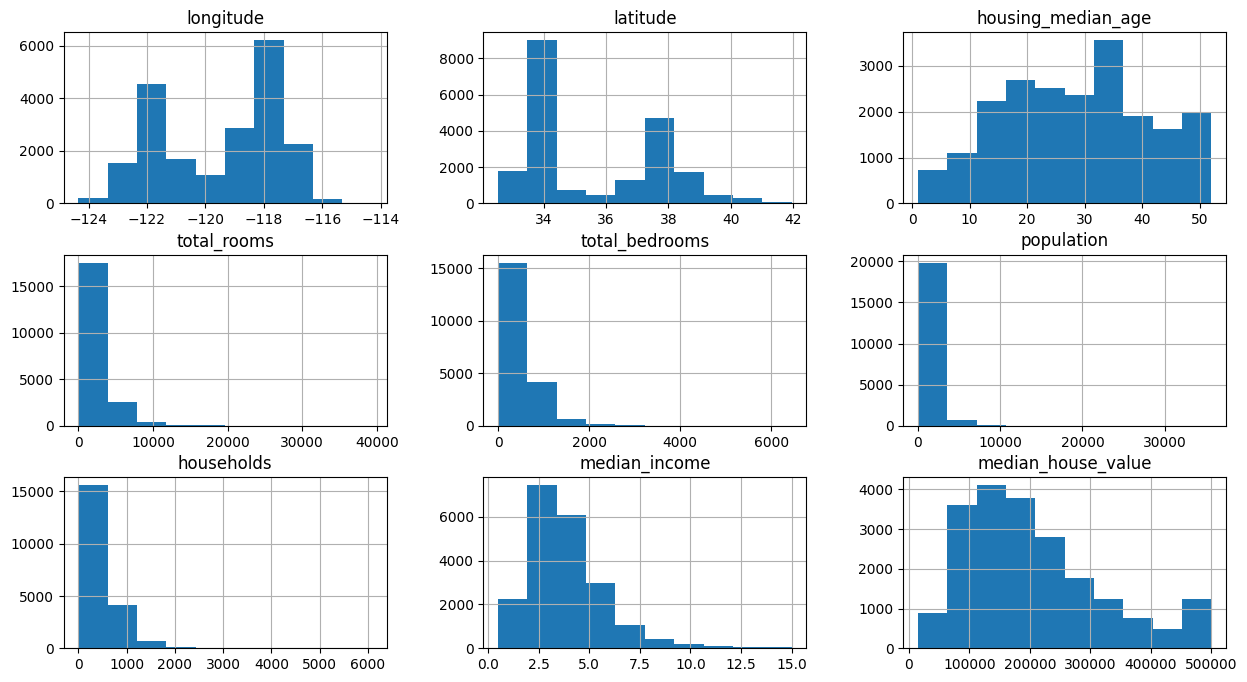

In [7]:
df.hist(figsize=(15,8))

<Axes: xlabel='latitude', ylabel='longitude'>

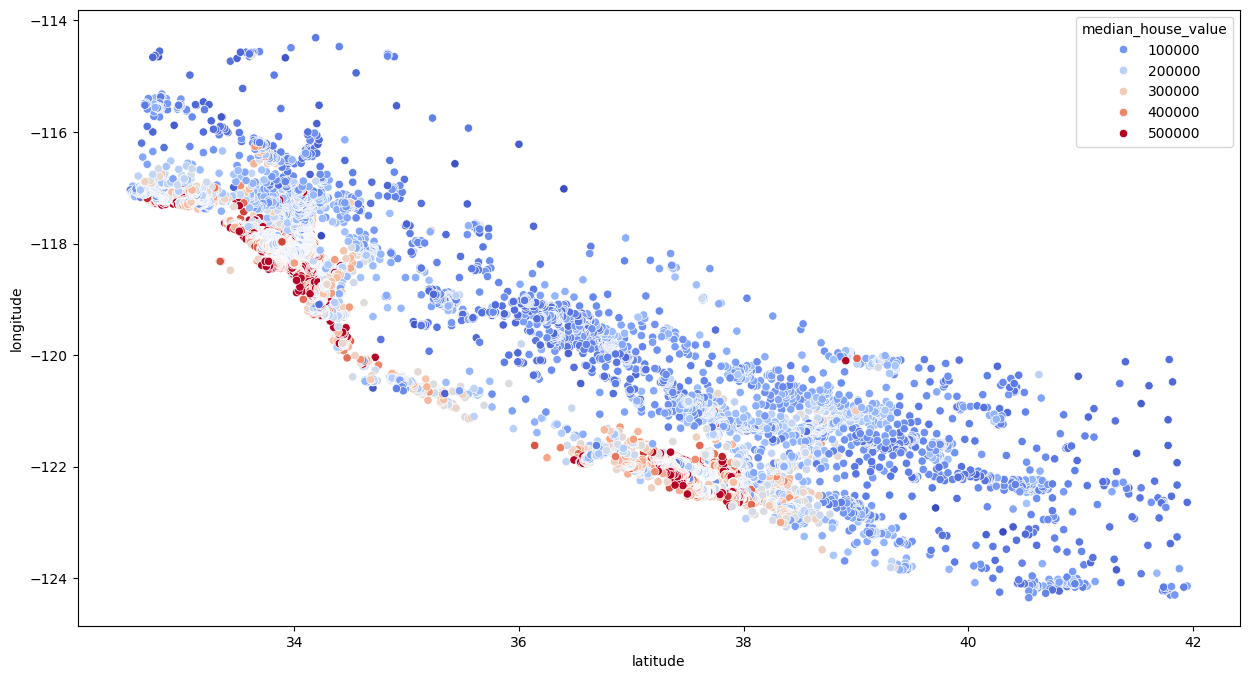

In [8]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude",data=df, hue="median_house_value",palette="coolwarm")

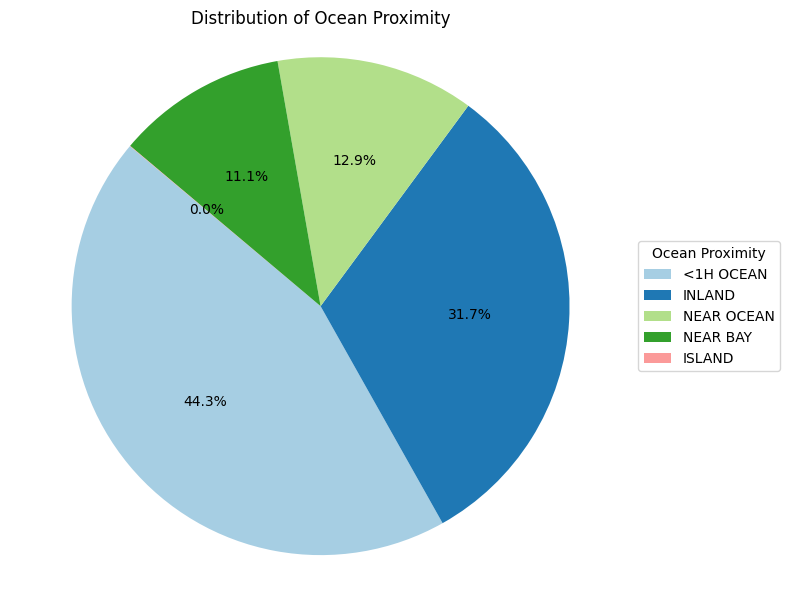

In [9]:
# Count the occurrences of each category in ocean_proximity
ocean_counts = df['ocean_proximity'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    ocean_counts,
    labels=None,  # Remove labels from the slices
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

# Add legend
plt.legend(wedges, ocean_counts.index, title="Ocean Proximity", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Ocean Proximity')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()
plt.show()


In [10]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

ocean_proximity
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
<1H OCEAN     240084.285464
INLAND        124805.392001
Name: median_house_value, dtype: float64


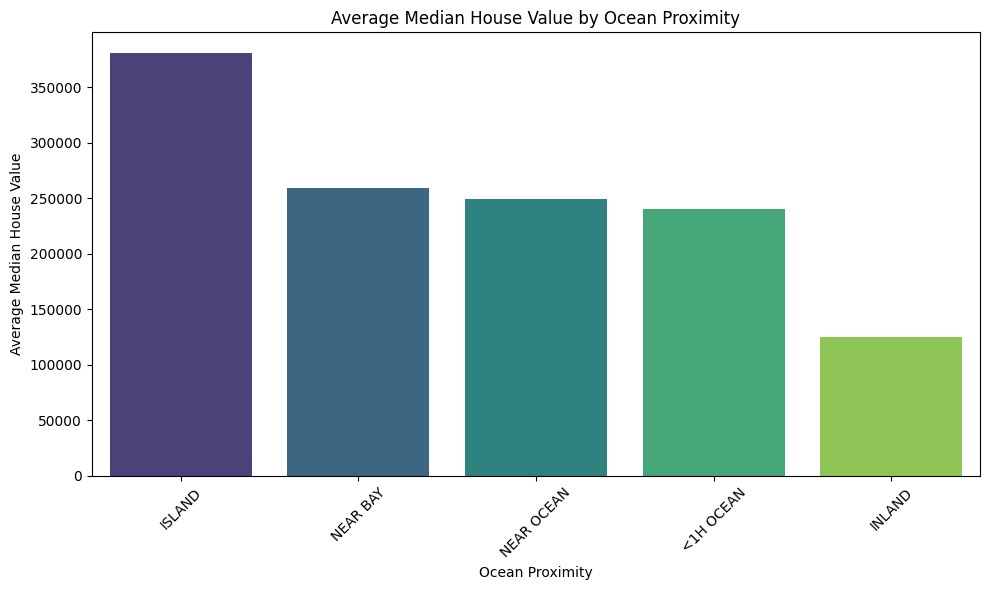

In [11]:
# Grouping by ocean_proximity and calculating the average median_house_value
avg_price_by_proximity = df.groupby("ocean_proximity")["median_house_value"].mean().sort_values(ascending=False)

# Display the result
print(avg_price_by_proximity)

# Optional: Visualize it with a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_by_proximity.index, y=avg_price_by_proximity.values, palette="viridis")
plt.title("Average Median House Value by Ocean Proximity")
plt.ylabel("Average Median House Value")
plt.xlabel("Ocean Proximity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


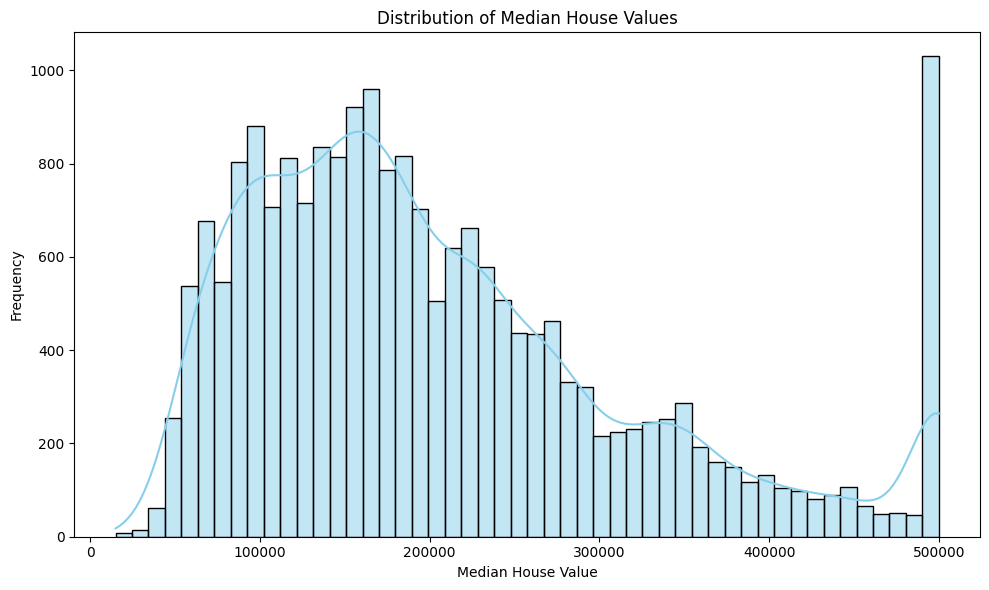

In [12]:


# Histogram of house prices
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="median_house_value", bins=50, kde=True, color="skyblue")
plt.title("Distribution of Median House Values")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## Splitting

In [13]:
# Drop NaN values from both X and y simultaneously
df_cleaned = df.dropna(subset=['median_house_value'])  # Drop rows with NaN in the target column
X = df_cleaned.drop(['median_house_value'], axis=1)         # Drop the 'Churn' column from the dataset to get features
y = df_cleaned['median_house_value']                        # Extract 'Churn' as the target variable

# Now, X and y should have the same number of samples
print(X.shape)
print(y.shape)


(20640, 9)
(20640,)


In [14]:
from sklearn.model_selection import train_test_split
# First, split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Multicollinearity Study & Feature Selection

In [15]:
# Calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

In [16]:
# Filter only numeric columns
df_train_numeric = X_test.select_dtypes(include=['number'])

# Add a constant
X = add_constant(df_train_numeric)

# Calculate VIF
vif_scores = pd.DataFrame({
    'Feature': X.columns,
    'VIF_score': [vif(X.values, i) for i in range(X.shape[1])]
})

# Remove the constant column from results
vif_scores = vif_scores[vif_scores['Feature'] != 'Const']

vif_scores.sort_values(by='VIF_score', ascending=False)

,Feature,VIF_score
0,const,17105.976643
7,households,17.610226
5,total_bedrooms,13.731321
4,total_rooms,10.602362
2,latitude,8.977335
1,longitude,8.848848
6,population,6.217995
8,median_income,1.593887
3,housing_median_age,1.272474


Total Bedroom, Household, Total Room, Latitude, Longtitude

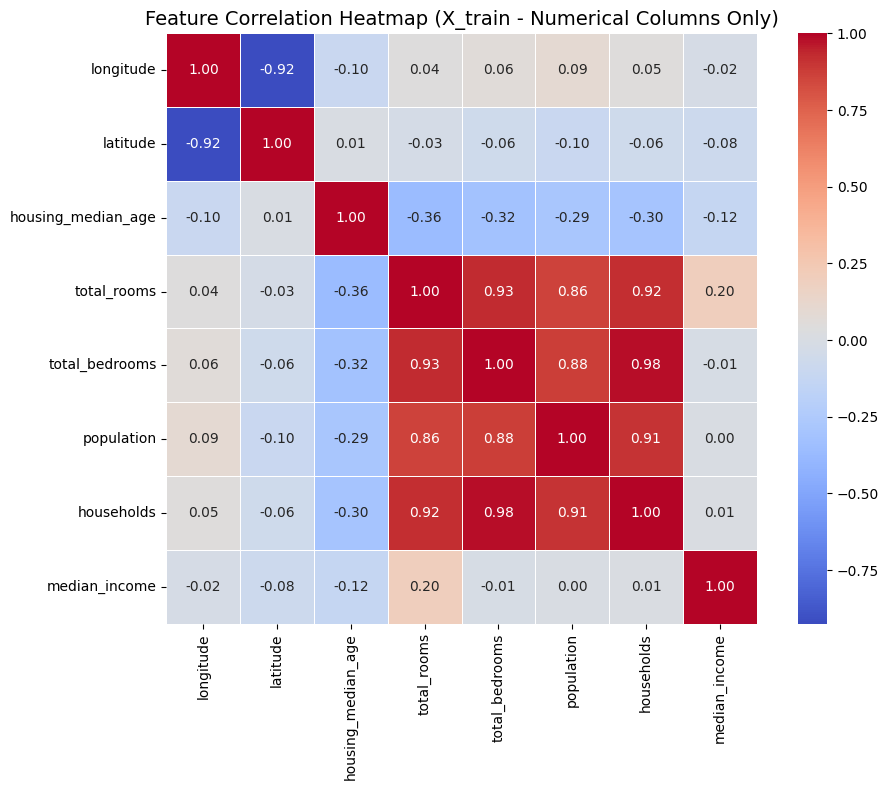

In [17]:
X_train_numeric = X_train.select_dtypes(include='number')

# Compute the correlation matrix for only numerical columns
corr_matrix = X_train_numeric.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap (X_train - Numerical Columns Only)", fontsize=14)
plt.tight_layout()
plt.show()

In [18]:
# Create ratio-based features
X_train['rooms_per_household'] = X_train['total_rooms'] / X_train['households']
X_train['bedrooms_per_room'] = X_train['total_bedrooms'] / X_train['total_rooms']
X_train['population_per_household'] = X_train['population'] / X_train['households']


In [19]:
X_train = X_train.drop(columns=['total_bedrooms', 'households', 'total_rooms', 'population'])


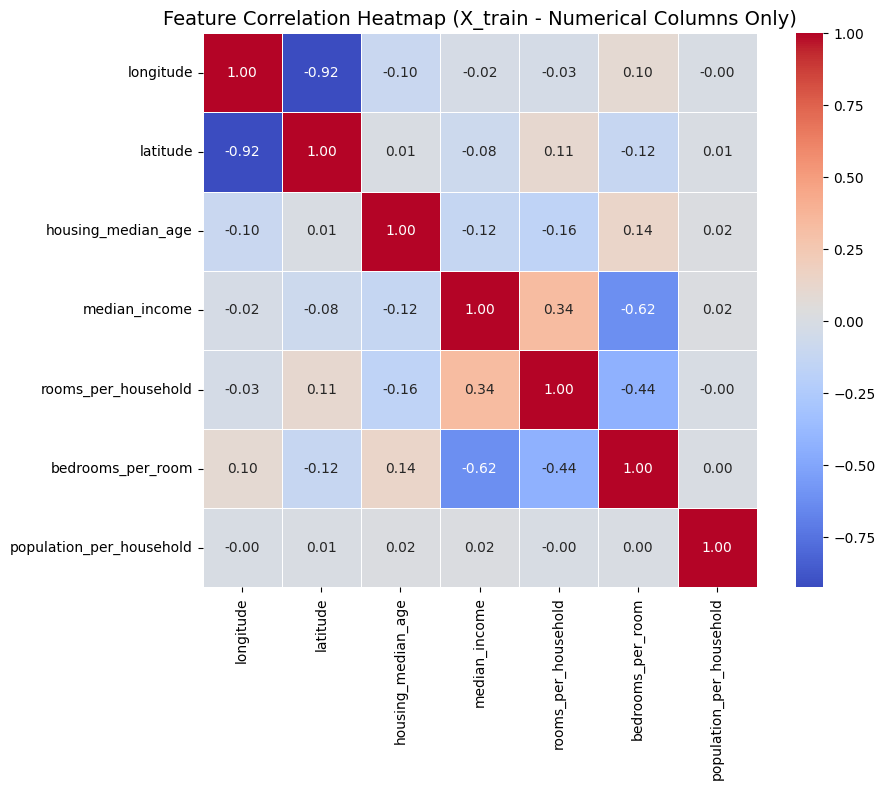

In [20]:
X_train_numeric = X_train.select_dtypes(include='number')

# Compute the correlation matrix for only numerical columns
corr_matrix = X_train_numeric.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap (X_train - Numerical Columns Only)", fontsize=14)
plt.tight_layout()
plt.show()

In [21]:
# Filter only numeric columns
df_train_numeric = X_test.select_dtypes(include=['number'])

# Add a constant
X = add_constant(df_train_numeric)

# Calculate VIF
vif_scores = pd.DataFrame({
    'Feature': X.columns,
    'VIF_score': [vif(X.values, i) for i in range(X.shape[1])]
})

# Remove the constant column from results
vif_scores = vif_scores[vif_scores['Feature'] != 'Const']

vif_scores.sort_values(by='VIF_score', ascending=False)

,Feature,VIF_score
0,const,17105.976643
7,households,17.610226
5,total_bedrooms,13.731321
4,total_rooms,10.602362
2,latitude,8.977335
1,longitude,8.848848
6,population,6.217995
8,median_income,1.593887
3,housing_median_age,1.272474


In [22]:
# Do the same Feature Engineering to the Test Data
X_test['rooms_per_household'] = X_test['total_rooms'] / X_test['households']
X_test['bedrooms_per_room'] = X_test['total_bedrooms'] / X_test['total_rooms']
X_test['population_per_household'] = X_test['population'] / X_test['households']
X_test = X_test.drop(columns=['total_bedrooms', 'households', 'total_rooms', 'population'])


## Encoding & Scaling

### Train

In [23]:
X_train.sample(5)

,longitude,latitude,housing_median_age,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
16898,-122.37,37.58,52.0,4.5486,NEAR OCEAN,6.884058,0.152632,2.409420
428,-122.28,37.88,52.0,4.1429,NEAR BAY,5.377155,0.196794,2.280172
20154,-119.19,34.46,39.0,6.6257,<1H OCEAN,5.541779,0.185311,2.530997
17128,-122.14,37.47,37.0,2.8868,NEAR BAY,4.784397,0.241625,4.126241
12442,-116.08,33.86,16.0,2.4250,INLAND,5.080000,0.233596,2.426667


In [24]:
one_hot_encode_cols = ["ocean_proximity"]
# One-Hot Encoding for multi-class categorical columns
X_train = pd.get_dummies(X_train, columns=one_hot_encode_cols, drop_first=False)

In [25]:
X_train_numeric = X_train.select_dtypes(include='number')

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
X_train[X_train_numeric.columns] = scaler.fit_transform(X_train_numeric)

In [26]:
X_train

,longitude,latitude,housing_median_age,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,1.272587,-1.372811,0.348490,-0.326196,-0.174916,-0.211785,0.051376,False,False,False,False,True
8267,0.709162,-0.876696,1.618118,-0.035843,-0.402835,0.342185,-0.117362,False,False,False,False,True
17445,-0.447603,-0.460146,-1.952710,0.144701,0.088216,-0.661658,-0.032280,False,False,False,False,True
14265,1.232698,-1.382172,0.586545,-1.017864,-0.600015,0.783032,0.077507,False,False,False,False,True
2271,-0.108551,0.532084,1.142008,-0.171488,0.349007,-0.550364,-0.068832,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.808883,-0.872016,0.507194,1.307215,0.290620,-1.064430,-0.005588,True,False,False,False,False
11964,1.073144,-0.759688,0.348490,-0.436266,0.600411,-0.483382,0.069722,False,True,False,False,False
5390,0.599469,-0.755007,0.586545,-0.496973,-0.606759,0.999514,0.020306,True,False,False,False,False
860,-1.185540,0.906510,-1.079841,0.965450,0.402175,-0.790862,0.007076,True,False,False,False,False


### Test

In [27]:
X_test.sample(5)

,longitude,latitude,housing_median_age,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
18386,-121.83,37.21,14.0,7.7738,<1H OCEAN,7.237333,0.133014,3.357333
14834,-117.10,32.68,20.0,2.0488,NEAR OCEAN,4.216667,0.265810,3.487500
4977,-118.29,34.00,44.0,2.1354,<1H OCEAN,4.613158,0.220764,3.065789
2699,-115.38,32.81,35.0,1.8958,INLAND,5.240664,0.207443,3.941909
11038,-117.80,33.83,17.0,11.1228,<1H OCEAN,8.586705,0.117805,3.410405


In [28]:
one_hot_encode_cols = ["ocean_proximity"]
# One-Hot Encoding for multi-class categorical columns
X_test = pd.get_dummies(X_test, columns=one_hot_encode_cols, drop_first=False)


In [29]:
X_test_numeric = X_test.select_dtypes(include='number')

# Fit and transform the numeric columns
X_test[X_test_numeric.columns] = scaler.transform(X_test_numeric)

In [30]:
X_test

,longitude,latitude,housing_median_age,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20046,0.285347,0.195100,-0.286324,-1.155085,-0.520686,1.313568,0.067408,False,True,False,False,False
3024,0.060975,-0.235491,0.110435,-0.708659,-0.165815,-1.121668,-0.036030,False,True,False,False,False
15663,-1.424870,1.009478,1.856173,-0.210402,-0.610765,-1.711928,-0.149989,False,False,False,True,False
20484,0.429943,-0.637999,-0.921138,0.975113,0.305115,-1.211888,0.030011,True,False,False,False,False
9814,-1.170581,0.457199,0.427842,-0.081794,0.024193,-0.479886,-0.052971,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
15362,1.177851,-1.068590,-1.000489,0.380334,0.656380,-1.044378,-0.009330,True,False,False,False,False
16623,-0.622115,-0.132523,-0.048268,-0.606098,0.291827,-0.136355,-0.065340,False,False,False,False,True
18086,-1.230414,0.780141,-0.286324,2.809024,0.755012,-1.413768,-0.026469,True,False,False,False,False
2144,-0.088607,0.527404,0.586545,-0.575430,-0.061243,-0.465197,-0.043905,False,True,False,False,False


# Modeling

## Model 1 - Random Forest

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   median_income               16512 non-null  float64
 4   rooms_per_household         16512 non-null  float64
 5   bedrooms_per_room           16512 non-null  float64
 6   population_per_household    16512 non-null  float64
 7   ocean_proximity_<1H OCEAN   16512 non-null  bool   
 8   ocean_proximity_INLAND      16512 non-null  bool   
 9   ocean_proximity_ISLAND      16512 non-null  bool   
 10  ocean_proximity_NEAR BAY    16512 non-null  bool   
 11  ocean_proximity_NEAR OCEAN  16512 non-null  bool   
dtypes: bool(5), float64(7)
memory usage: 1.1 MB


In [32]:
# Importing Model
from sklearn.ensemble import RandomForestRegressor


In [33]:
# Initialize Model dan Train
rf_model = RandomForestRegressor(
    n_estimators=100,     # number of trees
    max_depth=None,       # let trees grow fully (or set to a value to prevent overfitting)
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_train_pred = rf_model.predict(X_test)


In [35]:
print(X_train.shape)
print(y_train.shape)


(16512, 12)
(16512,)


In [36]:
# Evaluasi Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_train_pred)
mse = mean_squared_error(y_test, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_train_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2:   {r2:.4f}")


MAE:  32042.97
MSE:  2507224097.53
RMSE: 50072.19
R2:   0.8087


### With Hyperparameter Tuning

In [37]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

In [38]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=42)

In [39]:
# Set up GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                        # 5-fold cross-validation
    scoring='r2',                # You want the best R²
    n_jobs=-1,                   # Use all processors
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [40]:
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_rf = grid_search.best_estimator_

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [41]:
y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2:   {r2:.4f}")

MAE:  31166.31
MSE:  2507224097.53
RMSE: 47561.05
R2:   0.8274


Text(0.5, 1.0, 'Actual vs Predicted')

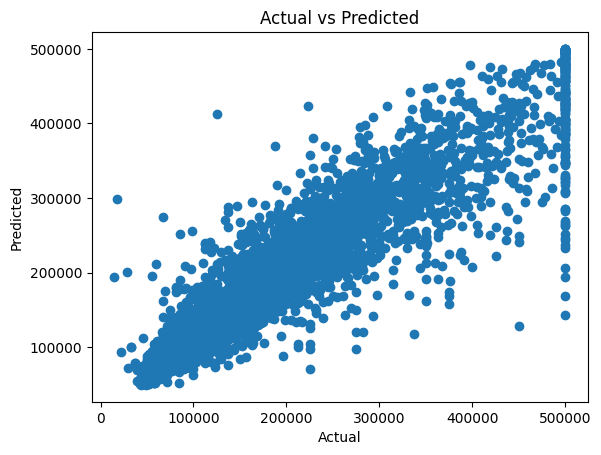

In [43]:
plt.scatter(y_test, y_pred_best)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")


                       Feature  Importance
3                median_income    0.286493
8       ocean_proximity_INLAND    0.136569
6     population_per_household    0.115367
5            bedrooms_per_room    0.106232
0                    longitude    0.099529
1                     latitude    0.093314
4          rooms_per_household    0.079554
2           housing_median_age    0.048806
7     ocean_proximity_1H OCEAN    0.019095
11  ocean_proximity_NEAR OCEAN    0.008748


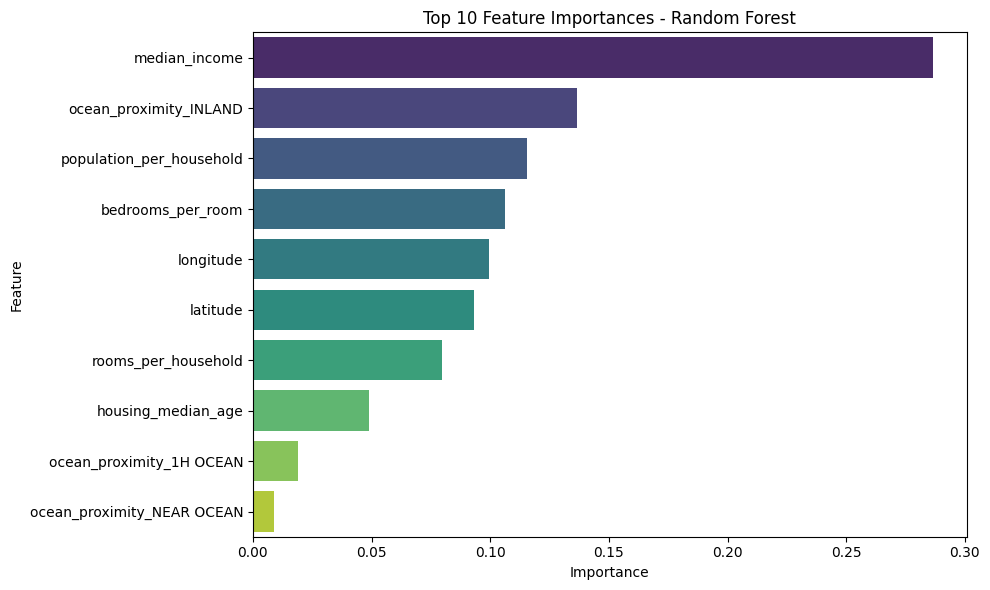

In [ ]:
# Create a DataFrame with feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print top features
print(feature_importance.head(10))

# Optional: Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

## Model 2 - XGBoost

In [44]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [45]:
# Sanitize feature names
X_train.columns = X_train.columns.astype(str).str.replace('[<>[\]]', '', regex=True)
X_test.columns = X_test.columns.astype(str).str.replace('[<>[\]]', '', regex=True)


In [46]:
X_train

,longitude,latitude,housing_median_age,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,1.272587,-1.372811,0.348490,-0.326196,-0.174916,-0.211785,0.051376,False,False,False,False,True
8267,0.709162,-0.876696,1.618118,-0.035843,-0.402835,0.342185,-0.117362,False,False,False,False,True
17445,-0.447603,-0.460146,-1.952710,0.144701,0.088216,-0.661658,-0.032280,False,False,False,False,True
14265,1.232698,-1.382172,0.586545,-1.017864,-0.600015,0.783032,0.077507,False,False,False,False,True
2271,-0.108551,0.532084,1.142008,-0.171488,0.349007,-0.550364,-0.068832,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.808883,-0.872016,0.507194,1.307215,0.290620,-1.064430,-0.005588,True,False,False,False,False
11964,1.073144,-0.759688,0.348490,-0.436266,0.600411,-0.483382,0.069722,False,True,False,False,False
5390,0.599469,-0.755007,0.586545,-0.496973,-0.606759,0.999514,0.020306,True,False,False,False,False
860,-1.185540,0.906510,-1.079841,0.965450,0.402175,-0.790862,0.007076,True,False,False,False,False


In [47]:
# Initialize model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [48]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2:   {r2:.4f}")

MAE:  31662.32
MSE:  2507224097.53
RMSE: 48490.82
R2:   0.8206


### XGBoost with Hyperparameter Tuning

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
# Define the model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [0, 1, 5],
    'reg_alpha': [0, 1, 5]
}

In [51]:
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,                  # Number of combinations to try
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [52]:
# Fit
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [54]:
# Predict
y_pred = best_xgb.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🔍 Best Params:", random_search.best_params_)
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2:   {r2:.4f}")

🔍 Best Params: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.8}
MAE:  29663.50
MSE:  2507224097.53
RMSE: 46043.20
R2:   0.8382


                       Feature  Importance
8       ocean_proximity_INLAND    0.587041
3                median_income    0.149440
6     population_per_household    0.041451
11  ocean_proximity_NEAR OCEAN    0.030602
7     ocean_proximity_1H OCEAN    0.029415
10    ocean_proximity_NEAR BAY    0.029041
9       ocean_proximity_ISLAND    0.025567
1                     latitude    0.023503
0                    longitude    0.022372
4          rooms_per_household    0.022147


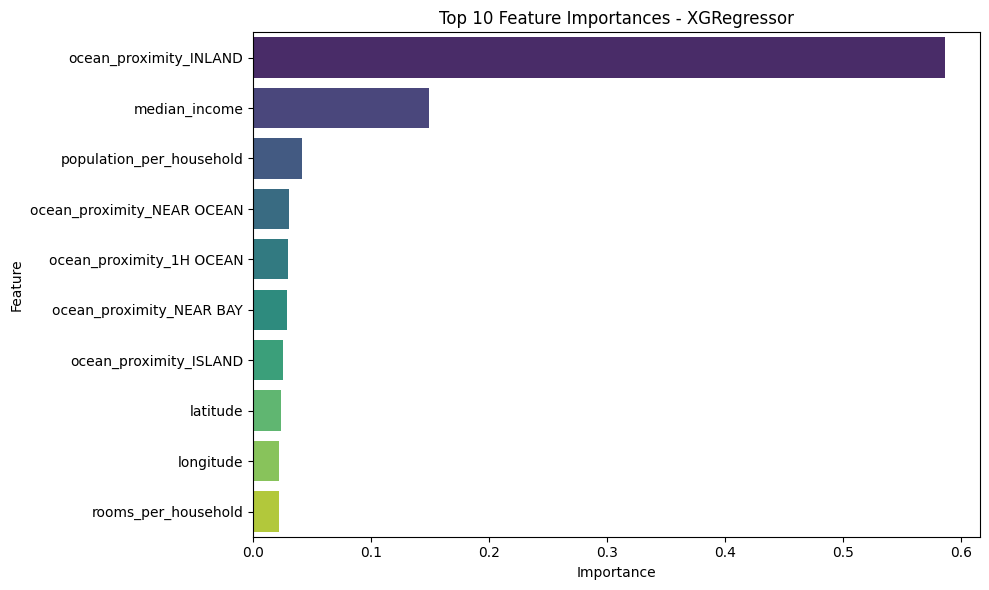

In [55]:
# Create a DataFrame with feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print top features
print(feature_importance.head(10))

# Optional: Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances - XGRegressor')
plt.tight_layout()
plt.show()

## Model 3 - GradientBoost

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
# Initialize model
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [59]:
# Predict
y_pred_gbr = gbr.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_gbr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2 = r2_score(y_test, y_pred_gbr)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2:   {r2:.4f}")

MAE:  36854.02
MSE:  2507224097.53
RMSE: 53861.60
R2:   0.7786


### With Hyperparameter Tuning

In [60]:
# Define the model
gbr = GradientBoostingRegressor(random_state=42)

In [61]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [62]:
# Randomized Search
random_search_gbr = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [63]:
# Fit the model
random_search_gbr.fit(X_train, y_train)

# Best model
best_gbr = random_search_gbr.best_estimator_

# Predict
y_pred_gbr_best = best_gbr.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [65]:
# Evaluate
mae = mean_absolute_error(y_test, y_pred_gbr_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr_best))
r2 = r2_score(y_test, y_pred_gbr_best)

# Results
print("🔍 Best Params:", random_search_gbr.best_params_)
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2:   {r2:.4f}")

🔍 Best Params: {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'learning_rate': 0.05}
MAE:  29330.24
MSE:  2507224097.53
RMSE: 45728.29
R2:   0.8404


                       Feature  Importance
3                median_income    0.266747
8       ocean_proximity_INLAND    0.161595
6     population_per_household    0.119122
5            bedrooms_per_room    0.104130
0                    longitude    0.103728
1                     latitude    0.096600
4          rooms_per_household    0.078917
2           housing_median_age    0.045105
7     ocean_proximity_1H OCEAN    0.013238
11  ocean_proximity_NEAR OCEAN    0.005660


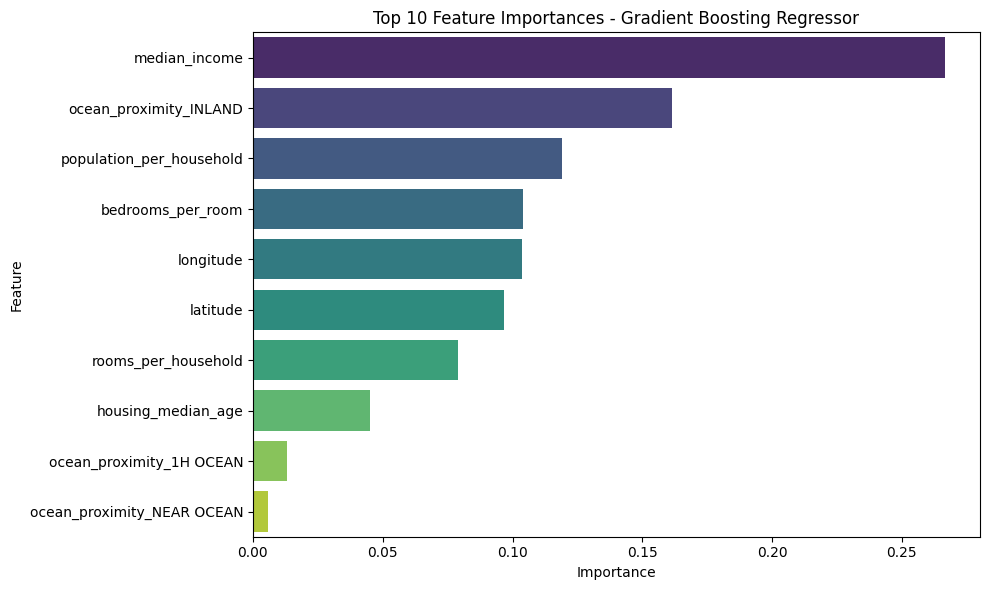

In [66]:
# Create a DataFrame with feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_gbr.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print top features
print(feature_importance.head(10))

# Optional: Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances - Gradient Boosting Regressor')
plt.tight_layout()
plt.show()

In [72]:
X_train.to_csv('X_train.csv', index=False)


# Evaluation

| **Model**          | **Metric** | **Without Hyperparameters** | **With Hyperparameters** |
|--------------------|------------|-----------------------------|--------------------------|
| **Random Forest**   | MAE        | 32042.97                    | 31166.31                 |
|                    | MSE        | 2507224097.53               | 2507224097.53            |
|                    | RMSE       | 50072.19                    | 47561.05                 |
|                    | R²         | 0.8087                      | 0.8274                   |
| **XGBoost**         | MAE        | 31662.32                    | 29663.50                 |
|                    | MSE        | 2507224097.53               | 2507224097.53            |
|                    | RMSE       | 48490.82                    | 46043.20                 |
|                    | R²         | 0.8206                      | 0.8382                   |
| **GradientBoost**   | MAE        | 36854.02                    | 29330.24                 |
|                    | MSE        | 2507224097.53               | 2507224097.53            |
|                    | RMSE       | 53861.60                    | 45728.29                 |
|                    | R²         | 0.7786                      | 0.8404                   |


## Test on New Data

In [ ]:
new_df = pd.read_csv("dummy_housing.csv")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           100 non-null    float64
 1   latitude            100 non-null    float64
 2   housing_median_age  100 non-null    int64  
 3   total_rooms         100 non-null    int64  
 4   total_bedrooms      100 non-null    int64  
 5   population          100 non-null    int64  
 6   households          100 non-null    int64  
 7   median_income       100 non-null    float64
 8   median_house_value  100 non-null    int64  
 9   ocean_proximity     100 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 7.9+ KB


In [ ]:
new_df['rooms_per_household'] = new_df['total_rooms'] / new_df['households']
new_df['bedrooms_per_room'] = new_df['total_bedrooms'] / new_df['total_rooms']
new_df['population_per_household'] = new_df['population'] / new_df['households']
new_df = new_df.drop(columns=['total_bedrooms', 'households', 'total_rooms', 'population'])


In [ ]:
X_new = new_df.drop("median_house_value", axis=1)
y_new = new_df["median_house_value"] 


In [ ]:
one_hot_encode_cols = ["ocean_proximity"]
# One-Hot Encoding for multi-class categorical columns
X_new = pd.get_dummies(X_new, columns=one_hot_encode_cols, drop_first=False)
X_new_numeric = X_new.select_dtypes(include='number')

# Fit and transform the numeric columns
X_new[X_new_numeric.columns] = scaler.transform(X_new_numeric)

In [ ]:
# Sanitize feature names
X_new.columns = X_new.columns.astype(str).str.replace('[<>[\]]', '', regex=True)


In [ ]:
X_new

,longitude,latitude,housing_median_age,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.502259,-1.313957,-0.365675,0.876438,-0.659809,0.909198,0.828368,False,False,False,True,False
1,2.382070,1.350497,1.856173,2.138467,0.606858,-2.029737,0.030052,False,False,False,False,True
2,1.287155,-0.067893,-1.397248,4.191836,-2.197142,78.180327,0.407055,False,False,True,False,False
3,0.619678,0.787466,1.618118,1.244092,0.127172,-2.123301,-0.169448,False,True,False,False,False
4,-1.596178,2.544720,-1.635303,2.961579,-0.886182,-1.425372,-0.076764,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.094734,0.085609,1.459415,-1.000377,9.446323,-0.742134,1.661576,False,False,False,False,True
96,0.239594,1.744872,-0.524379,-0.611455,5.936952,0.038670,0.326102,True,False,False,False,False
97,-0.236936,2.498669,-0.445027,0.097438,4.243708,-3.493701,0.398003,False,False,False,True,False
98,-2.249959,2.454522,-2.111414,-0.551903,-0.151332,-0.549509,0.339435,False,True,False,False,False


In [ ]:
print("✅ y_new shape:", y_new.shape)
print("✅ y_pred shape:", y_pred.shape)


✅ y_new shape: (100,)
✅ y_pred shape: (4128,)


In [ ]:
# Predict on new data
y_pred_new = best_gbr.predict(X_new)

# Evaluate on new data
mae = mean_absolute_error(y_new, y_pred_new)
rmse = np.sqrt(mean_squared_error(y_new, y_pred_new))
r2 = r2_score(y_new, y_pred_new)  
# Results
print("🔍 Best Params:", random_search_gbr.best_params_)
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2:   {r2:.4f}")

🔍 Best Params: {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'learning_rate': 0.05}
MAE:  142526.95
MSE:  2507224097.53
RMSE: 170646.16
R2:   -0.5776


In [68]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
import joblib

In [71]:
# Save the model
joblib.dump(best_gbr, 'best_gbr_model.pkl')

['best_gbr_model.pkl']